In [82]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.


In [83]:
tienda.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [84]:
ingreso_tienda1 = tienda["Precio"].sum()
ingreso_tienda2 = tienda2["Precio"].sum()
ingreso_tienda3 = tienda3["Precio"].sum()
ingreso_tienda4 = tienda4["Precio"].sum()

In [85]:
# Creando un DataFrame resumen con los ingresos
#import pandas as pd

ingresos = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Ingreso Total": [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]
})

# Ordenando  de mayor a menor ingreso
ingresos = ingresos.sort_values("Ingreso Total", ascending=False)
display(ingresos)


,Tienda,Ingreso Total
0,Tienda 1,1.150880e+09
1,Tienda 2,1.116344e+09
2,Tienda 3,1.098020e+09
3,Tienda 4,1.038376e+09


/tmp/ipython-input-86-980834895.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ingresos, x="Tienda", y="Ingreso Total", palette="mako")


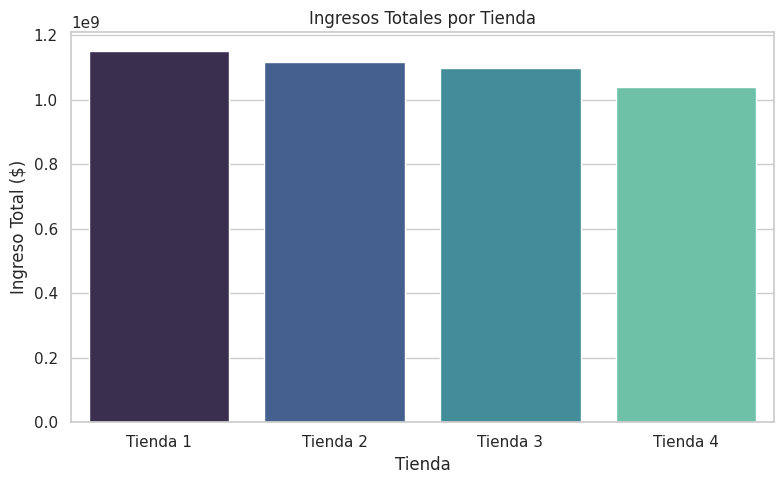

In [86]:
# Visualizar con gráfico de barras
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(data=ingresos, x="Tienda", y="Ingreso Total", palette="mako")
plt.title("Ingresos Totales por Tienda")
plt.ylabel("Ingreso Total ($)")
plt.xlabel("Tienda")
plt.tight_layout()
plt.show()

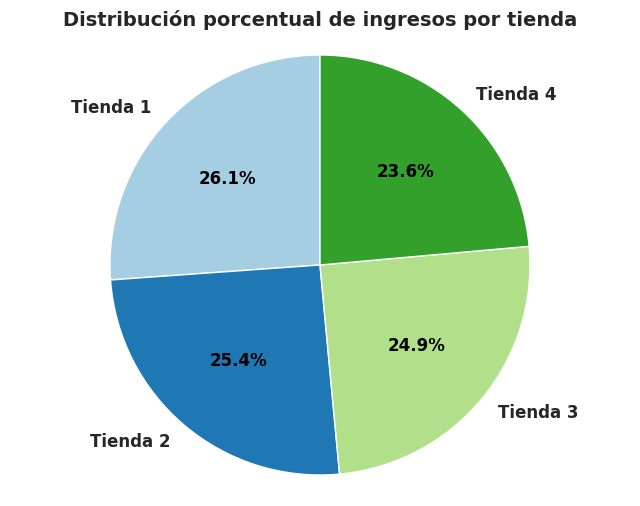

In [87]:
#import matplotlib.pyplot as plt

# Recalculando los ingresos por tienda
ingreso_tienda1 = tienda["Precio"].sum()
ingreso_tienda2 = tienda2["Precio"].sum()
ingreso_tienda3 = tienda3["Precio"].sum()
ingreso_tienda4 = tienda4["Precio"].sum()


ingresos = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Ingreso Total": [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]
})

# Ordenar
ingresos = ingresos.sort_values("Ingreso Total", ascending=False)

# Gráfico de torta # Gráfico de torta   Distribución porcentual de ingresos por tienda
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    ingresos["Ingreso Total"],
    labels=ingresos["Tienda"],
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)


for autotext in autotexts:
    autotext.set_color('black')

plt.title("Distribución porcentual de ingresos por tienda", fontsize=14, fontweight='bold')
plt.axis("equal")
plt.show()

# 2. Ventas por categoría

En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

Cantidad de Productos vendidos por categoria en cada tienda

In [88]:
ventas_t1 = tienda["Categoría del Producto"].value_counts().rename("Tienda 1")
ventas_t2 = tienda2["Categoría del Producto"].value_counts().rename("Tienda 2")
ventas_t3 = tienda3["Categoría del Producto"].value_counts().rename("Tienda 3")
ventas_t4 = tienda4["Categoría del Producto"].value_counts().rename("Tienda 4")

# Uniendo los resultados en un único DataFrame, alineado por categoría
ventas_categorias = pd.concat([ventas_t1, ventas_t2, ventas_t3, ventas_t4], axis=1).fillna(0)


ventas_categorias = ventas_categorias.astype(int)

# Mostrando el resultado
ventas_categorias.reset_index(inplace=True)
ventas_categorias = ventas_categorias.rename(columns={"index": "Categoría del Producto"})

display(ventas_categorias)

,Categoría del Producto,Tienda 1,Tienda 2,Tienda 3,Tienda 4
0,Muebles,465,442,499,480
1,Electrónicos,448,422,451,451
2,Juguetes,324,313,315,338
3,Electrodomésticos,312,305,278,254
4,Deportes y diversión,284,275,277,277
5,Instrumentos musicales,182,224,177,170
6,Libros,173,197,185,187
7,Artículos para el hogar,171,181,177,201


Las 5 categorías de productos mas vendidos por tienda

In [89]:
# Obtener cantidad de productos vendidos por categoría en cada tienda
ventas_t1 = tienda["Categoría del Producto"].value_counts().rename("Tienda 1")
ventas_t2 = tienda2["Categoría del Producto"].value_counts().rename("Tienda 2")
ventas_t3 = tienda3["Categoría del Producto"].value_counts().rename("Tienda 3")
ventas_t4 = tienda4["Categoría del Producto"].value_counts().rename("Tienda 4")

# Unir resultados en un solo DataFrame
ventas_categorias = pd.concat([ventas_t1, ventas_t2, ventas_t3, ventas_t4], axis=1).fillna(0).astype(int)

# Calcular total por categoría (para seleccionar las 5 más vendidas)
ventas_categorias["Total"] = ventas_categorias.sum(axis=1)

# Seleccionar solo las 5 categorías más vendidas
top5_categorias = ventas_categorias.sort_values(by="Total", ascending=False).head(5)

# Eliminar columna 'Total' (opcional)
top5_categorias = top5_categorias.drop(columns="Total")

# Restablecer índice para que la categoría sea una columna
top5_categorias = top5_categorias.reset_index().rename(columns={"index": "Categoría del Producto"})

# Mostrar resultado
display(top5_categorias)

,Categoría del Producto,Tienda 1,Tienda 2,Tienda 3,Tienda 4
0,Muebles,465,442,499,480
1,Electrónicos,448,422,451,451
2,Juguetes,324,313,315,338
3,Electrodomésticos,312,305,278,254
4,Deportes y diversión,284,275,277,277


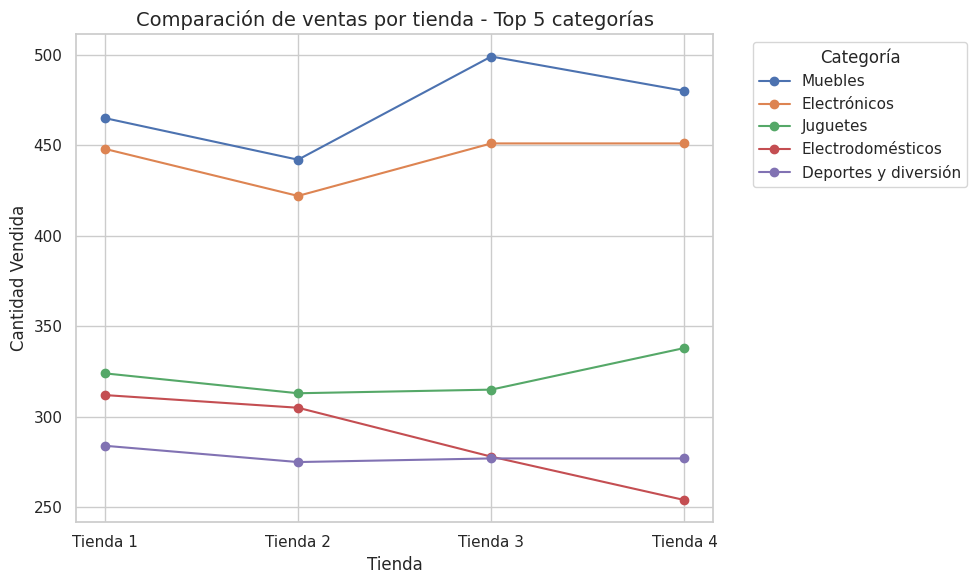

In [90]:
#import matplotlib.pyplot as plt



plt.figure(figsize=(10, 6))

# Iterar sobre cada fila (categoría) para trazar la línea correspondiente
for i in range(top5_categorias.shape[0]):
    categoria = top5_categorias.loc[i, "Categoría del Producto"]
    valores = top5_categorias.loc[i, ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]]
    plt.plot(["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
             valores,
             marker='o',
             label=categoria)

# Títulos y etiquetas
plt.title("Comparación de ventas por tienda - Top 5 categorías", fontsize=14)
plt.xlabel("Tienda")
plt.ylabel("Cantidad Vendida")
plt.grid(True)
plt.legend(title="Categoría", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar gráfico
plt.show()

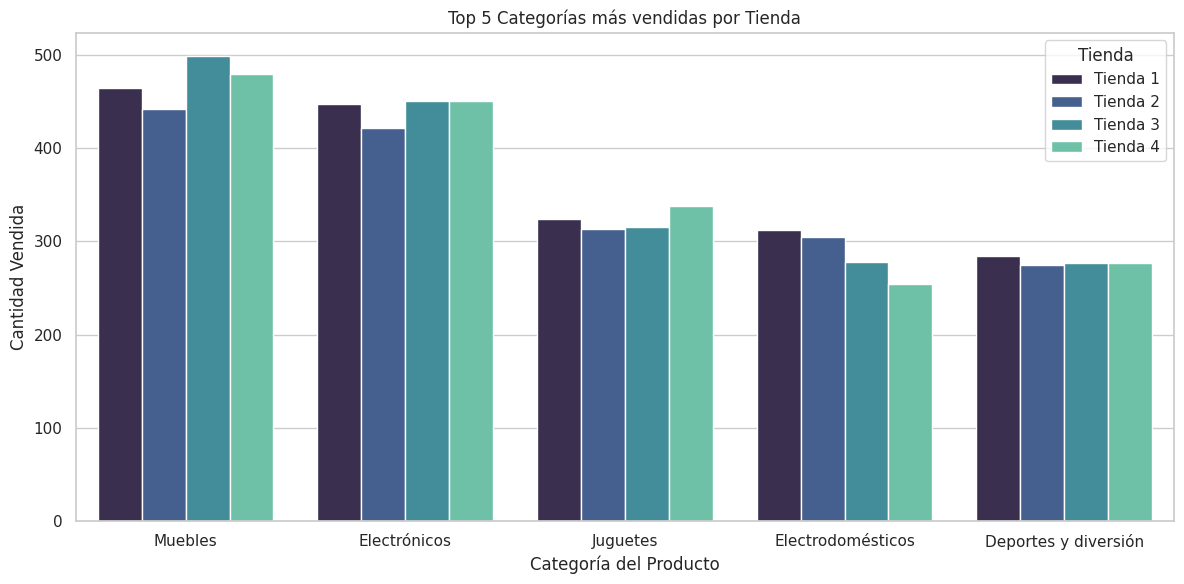

In [91]:
#import matplotlib.pyplot as plt
#import seaborn as sns

# Elegimos una paleta de colores más diferenciada
plt.figure(figsize=(12, 6))
sns.barplot(data=top_categorias_totales, x="Categoría", y="Cantidad Vendida", hue="Tienda", palette="mako" )

# Título y etiquetas
plt.title("Top 5 Categorías más vendidas por Tienda")
plt.ylabel("Cantidad Vendida")
plt.xlabel("Categoría del Producto")

# Poner nombres de categorías en paralelo al eje X
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [92]:
# Calcular promedio y cantidad de calificaciones por tienda
prom_tienda1 = tienda["Calificación"].mean()
prom_tienda2 = tienda2["Calificación"].mean()
prom_tienda3 = tienda3["Calificación"].mean()
prom_tienda4 = tienda4["Calificación"].mean()

cant_tienda1 = tienda["Calificación"].count()
cant_tienda2 = tienda2["Calificación"].count()
cant_tienda3 = tienda3["Calificación"].count()
cant_tienda4 = tienda4["Calificación"].count()

# Crear DataFrame resumen
import pandas as pd

calificaciones = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Calificación Promedio": [prom_tienda1, prom_tienda2, prom_tienda3, prom_tienda4],
    "Cantidad de Reseñas": [cant_tienda1, cant_tienda2, cant_tienda3, cant_tienda4]
})

calificaciones = calificaciones.sort_values("Calificación Promedio", ascending=False)
display(calificaciones)

,Tienda,Calificación Promedio,Cantidad de Reseñas
2,Tienda 3,4.048326,2359
1,Tienda 2,4.037304,2359
3,Tienda 4,3.995759,2358
0,Tienda 1,3.976685,2359


/tmp/ipython-input-93-2470359298.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=calificaciones, x="Tienda", y="Calificación Promedio",palette="mako" )


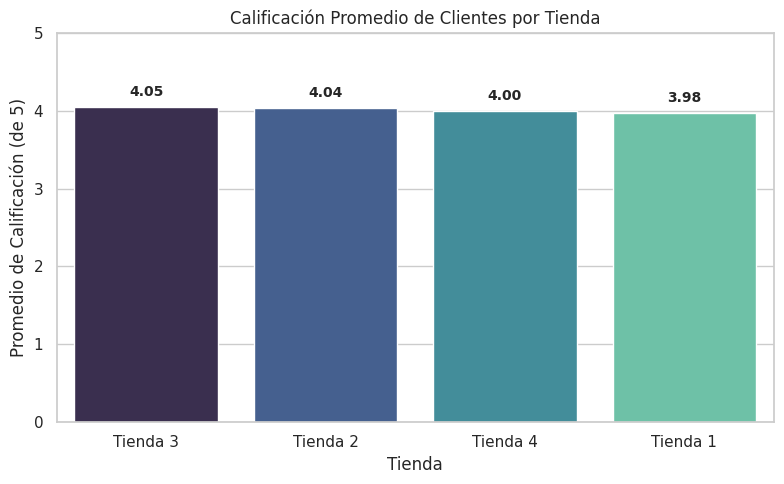

In [93]:
#import matplotlib.pyplot as plt
#import seaborn as sns

plt.figure(figsize=(8, 5))
barplot = sns.barplot(data=calificaciones, x="Tienda", y="Calificación Promedio",palette="mako" )
plt.title("Calificación Promedio de Clientes por Tienda")
plt.ylim(0, 5)
plt.ylabel("Promedio de Calificación (de 5)")
plt.xlabel("Tienda")

# Agregar etiquetas con los valores exactos sobre cada barra
for i, bar in enumerate(barplot.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.1,
             f"{height:.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [94]:
from IPython.display import display, HTML

# Más vendidos - Tienda 1
mas_vendidos_1 = tienda['Producto'].value_counts().head(5).reset_index()
mas_vendidos_1.columns = ['Producto', 'Cantidad Vendida']

# Menos vendidos - Tienda 1
menos_vendidos_1 = tienda['Producto'].value_counts().tail(5).reset_index()
menos_vendidos_1.columns = ['Producto', 'Cantidad Vendida']

# Mostrar uno al lado del otro
display(HTML(f"""
<div style="display: flex; gap: 40px;">
  <div>
    <h3>Tienda 1 - Productos más vendidos</h3>
    {mas_vendidos_1.to_html(index=False)}
  </div>
  <div>
    <h3>Tienda 1 - Productos menos vendidos</h3>
    {menos_vendidos_1.to_html(index=False)}
  </div>
</div>
"""))



# Más y menos vendidos - Tienda 2
mas_vendidos_2 = tienda2['Producto'].value_counts().head(5).reset_index()
mas_vendidos_2.columns = ['Producto', 'Cantidad Vendida']
menos_vendidos_2 = tienda2['Producto'].value_counts().tail(5).reset_index()
menos_vendidos_2.columns = ['Producto', 'Cantidad Vendida']

# Mostrar
display(HTML(f"""
<div style="display: flex; gap: 40px;">
  <div>
    <h3>Tienda 2 - Productos más vendidos</h3>
    {mas_vendidos_2.to_html(index=False)}
  </div>
  <div>
    <h3>Tienda 2 - Productos menos vendidos</h3>
    {menos_vendidos_2.to_html(index=False)}
  </div>
</div>
"""))




mas_vendidos_3 = tienda3['Producto'].value_counts().head(5).reset_index()
mas_vendidos_3.columns = ['Producto', 'Cantidad Vendida']
menos_vendidos_3 = tienda3['Producto'].value_counts().tail(5).reset_index()
menos_vendidos_3.columns = ['Producto', 'Cantidad Vendida']

display(HTML(f"""
<div style="display: flex; gap: 40px;">
  <div>
    <h3>Tienda 3 - Productos más vendidos</h3>
    {mas_vendidos_3.to_html(index=False)}
  </div>
  <div>
    <h3>Tienda 3 - Productos menos vendidos</h3>
    {menos_vendidos_3.to_html(index=False)}
  </div>
</div>
"""))





mas_vendidos_4 = tienda4['Producto'].value_counts().head(5).reset_index()
mas_vendidos_4.columns = ['Producto', 'Cantidad Vendida']
menos_vendidos_4 = tienda4['Producto'].value_counts().tail(5).reset_index()
menos_vendidos_4.columns = ['Producto', 'Cantidad Vendida']

display(HTML(f"""
<div style="display: flex; gap: 40px;">
  <div>
    <h3>Tienda 4 - Productos más vendidos</h3>
    {mas_vendidos_4.to_html(index=False)}
  </div>
  <div>
    <h3>Tienda 4 - Productos menos vendidos</h3>
    {menos_vendidos_4.to_html(index=False)}
  </div>
</div>
"""))

Producto,Cantidad Vendida
Microondas,60
TV LED UHD 4K,60
Armario,60
Secadora de ropa,58
Mesa de noche,56
Producto,Cantidad Vendida
Ciencia de datos con Python,39
Pandereta,36
Olla de presión,35
Auriculares con micrófono,33


Producto,Cantidad Vendida
Iniciando en programación,65
Microondas,62
Batería,61
Guitarra acústica,58
Pandereta,58
Producto,Cantidad Vendida
Auriculares,37
Sillón,35
Mesa de comedor,34
Impresora,34


Producto,Cantidad Vendida
Kit de bancas,57
Mesa de comedor,56
Cama king,56
Set de ollas,55
Mesa de noche,55
Producto,Cantidad Vendida
Guitarra eléctrica,38
Set de vasos,36
Mochila,36
Microondas,36


Producto,Cantidad Vendida
Cama box,62
Cubertería,59
Dashboards con Power BI,56
Cama king,56
Carrito de control remoto,55
Producto,Cantidad Vendida
Refrigerador,38
Ciencia de datos con Python,38
Guitarra acústica,37
Armario,34


# 5. Envío promedio por tienda

En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.

,Tienda,Costo de Envío Promedio
0,Tienda 1,26018.609580
1,Tienda 2,25216.235693
2,Tienda 3,24805.680373
3,Tienda 4,23459.457167


/tmp/ipython-input-95-1013645360.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=envios_promedio, x="Tienda", y="Costo de Envío Promedio", palette="mako")


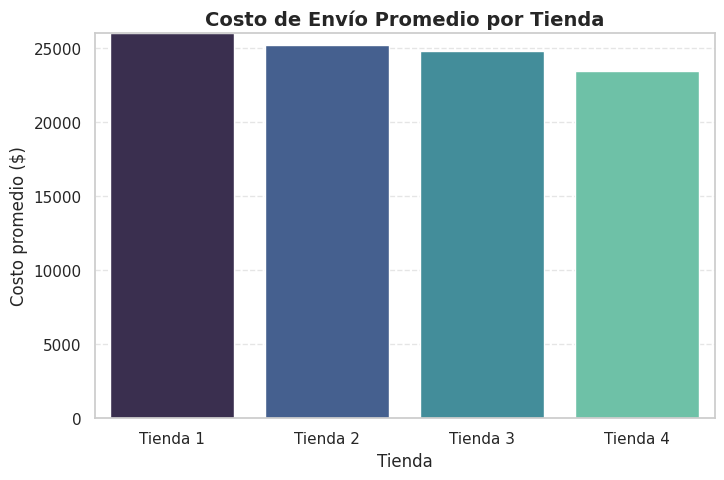

In [95]:
#import matplotlib.pyplot as plt
#import seaborn as sns

# Calcular el costo de envío promedio por tienda
envio_prom_t1 = tienda["Costo de envío"].mean()
envio_prom_t2 = tienda2["Costo de envío"].mean()
envio_prom_t3 = tienda3["Costo de envío"].mean()
envio_prom_t4 = tienda4["Costo de envío"].mean()

# Crear DataFrame con los resultados
envios_promedio = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Costo de Envío Promedio": [envio_prom_t1, envio_prom_t2, envio_prom_t3, envio_prom_t4]
})

# Mostrar tabla
display(envios_promedio)

# Gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(data=envios_promedio, x="Tienda", y="Costo de Envío Promedio", palette="mako")


plt.title("Costo de Envío Promedio por Tienda", fontsize=14, fontweight='bold')
plt.ylabel("Costo promedio ($)")
plt.ylim(0, envios_promedio["Costo de Envío Promedio"].max() + 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

**INFORME FINAL**

 Introducción

Este análisis fue realizado con el objetivo de ayudar al Sr. Juan a tomar una decisión estratégica sobre cuál de sus tiendas de la cadena Alura Store debería vender. Para esto, analizamos información clave proveniente de las cuatro tiendas activas, evaluando aspectos como ingresos totales, desempeño por categoría, satisfacción del cliente, productos más y menos vendidos y costos de envío.

El propósito es identificar la tienda menos eficiente, evaluando tanto su rentabilidad como su desempeño operativo y satisfacción del cliente, para fundamentar una recomendación clara y objetiva.

Análisis por dimensión
1. Ingresos
Tienda 4 es la tienda con menos ingresos totales, muy por debajo de las demás.

La diferencia con la mejor tienda (Tienda 1) es de más de 112 millones , lo cual es significativo.

2. Calificación de clientes
Tienda 3 tiene la mejor calificación (4.05), seguida de Tienda 2 (4.04).

Tienda 1 tiene la calificación más baja (3.98), aunque no por mucho.

Tienda 4 está en un punto medio, con 3.99, apenas por encima de Tienda 1.

3. Costo de Envío Promedio
Tienda 4 tiene el costo de envío más bajo, lo cual en otro contexto sería una fortaleza.

Sin embargo, el costo bajo no compensa su bajo ingreso ni su rendimiento general.

 Conclusión y Recomendación
Basado en los datos proporcionados:

 Recomiendo que el Sr. Juan venda la Tienda 4.

Justificación:

Es la tienda con el menor ingreso total, lo cual afecta directamente su rentabilidad.

Tiene una calificación promedio mediocre (3.99), inferior a las tiendas 2 y 3, y apenas por encima de la tienda 1.

Aunque su costo de envío promedio es el más bajo, eso no compensa su bajo rendimiento comercial.

En resumen: la Tienda 4 no destaca en ninguna métrica clave, y es la que menos valor económico aportaría a futuro, por lo tanto es la mejor candidata para ser vendida.